# EDA

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
df = pd.read_csv("A:/NTI/SentimentAnalysisProject/data/processed/talabat_cleaned_reviews.csv")
df.sample(5)

,userName,content,score,at,sentiment,clean_text
1681,مستخدم Google,تحفه,5,2025-06-18 12:40:15,positive,تحفه
4062,مستخدم Google,تطبيق ممتاز جدا ومجهود جبار,5,2025-05-02 20:52:28,positive,ممتاز جدا ومجهود جبار
5962,مستخدم Google,Bad,1,2025-03-26 17:56:11,negative,NaN
8099,مستخدم Google,تطبيق ممتاز يقدم خدمات رائعه,5,2025-01-30 11:13:42,positive,ممتاز يقدم خدمات رائعه
7192,مستخدم Google,برنامج حلو صراحه و المنتجات بتيجي بسرعه بس رسو...,5,2025-02-21 00:22:08,positive,حلو صراحه المنتجات بتيجي بسرعه رسوم الخدمه الت...


C:\Users\MF\AppData\Local\Temp\ipykernel_41544\3511519433.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df, x='score', palette='Set2')


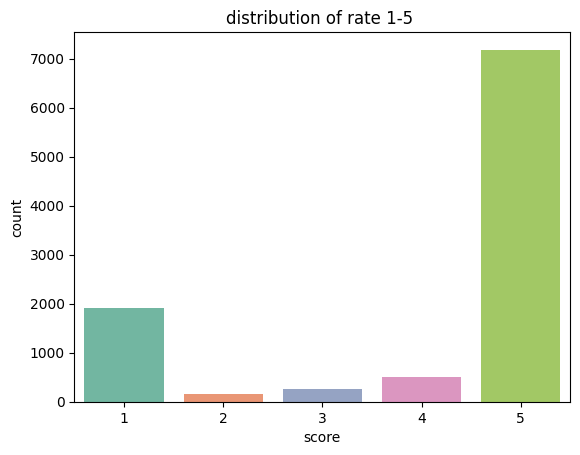

In [35]:
sns.countplot(df, x='score', palette='Set2')
plt.title("distribution of rate 1-5 ")
plt.show()

C:\Users\MF\AppData\Local\Temp\ipykernel_41544\2171331726.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', order=['positive', 'neutral', 'negative'], palette='coolwarm')


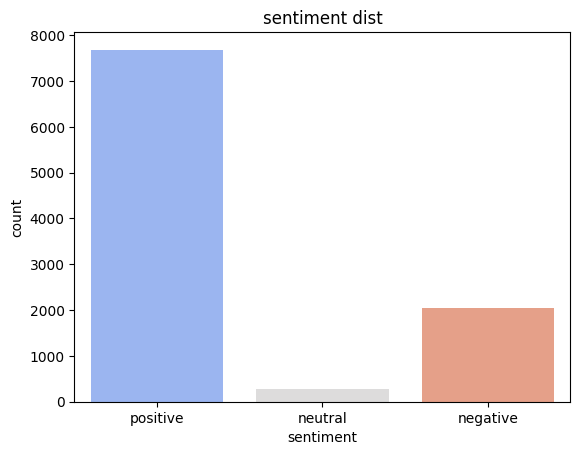

In [36]:
sns.countplot(data=df, x='sentiment', order=['positive', 'neutral', 'negative'], palette='coolwarm')
plt.title("sentiment dist")
plt.show()

In [37]:
!pip install python-bidi arabic-reshaper wordcloud


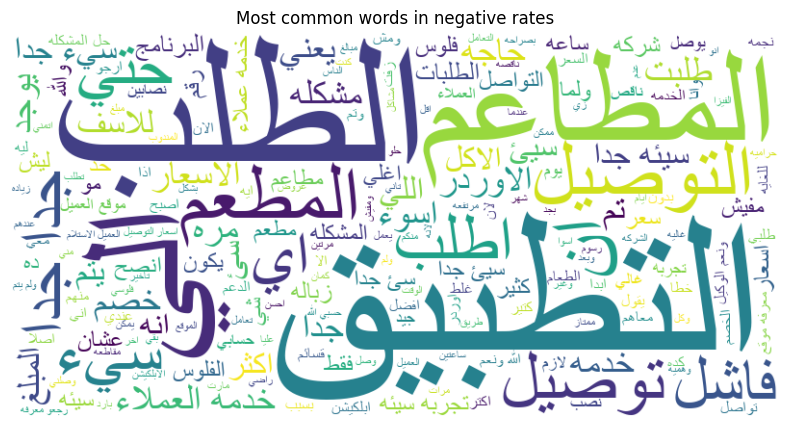

In [38]:
from wordcloud import WordCloud
from arabic_reshaper import reshape
from bidi.algorithm import get_display

neg_texts = df[df['sentiment'] == 'negative']['clean_text'].dropna().astype(str)
negative_text = ' '.join(neg_texts)

reshaped_text = reshape(negative_text)
bidi_text = get_display(reshaped_text)

wordcloud = WordCloud(font_path='arial', background_color='white', width=800, height=400).generate(bidi_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most common words in negative rates")
plt.show()

In [39]:
pos_reviews = df[df['sentiment'] == 'positive']['clean_text'].dropna().astype(str)

In [40]:
from nltk.corpus import stopwords

custom_stopwords = set(stopwords.words('arabic')).union({
    'تطبيق', 'برنامج', 'طلب', 'طلبات', 'علي', 'او', 'انا', 'في', 'مش', 'من', 'هو', 'هي', 'إلي', 'المطاعم', 'مطاعم'
})

def remove_custom_stopwords(text):
    return ' '.join([w for w in text.split() if w not in custom_stopwords])

pos_filtered = pos_reviews.apply(remove_custom_stopwords)


In [41]:
from collections import Counter

all_words = ' '.join(pos_filtered)
word_list = all_words.split()
word_counts = Counter(word_list)

top_positive_words = word_counts.most_common(20)
top_positive_words


[('ممتاز', 1639),
 ('جدا', 1541),
 ('رائع', 616),
 ('جيد', 599),
 ('جميل', 501),
 ('ممتازه', 453),
 ('افضل', 286),
 ('حلو', 268),
 ('سريع', 239),
 ('التوصيل', 209),
 ('توصيل', 187),
 ('خدمه', 183),
 ('احسن', 165),
 ('تجربه', 164),
 ('شكرا', 158),
 ('التطبيق', 157),
 ('رائعه', 134),
 ('جيده', 126),
 ('تحفه', 125),
 ('الله', 104)]

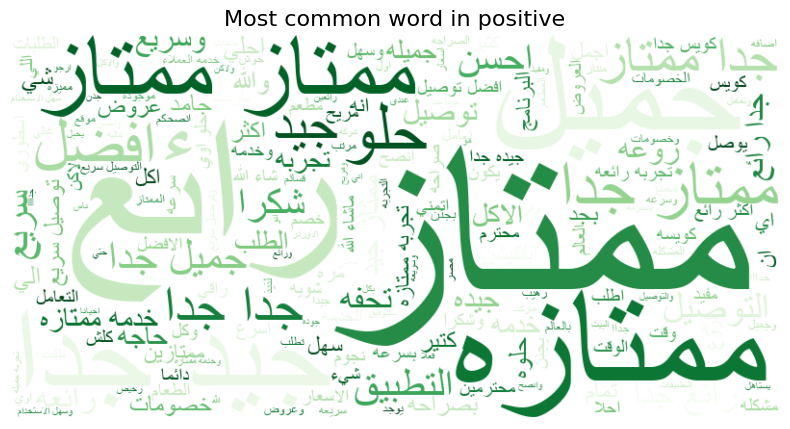

In [42]:
from wordcloud import WordCloud
from arabic_reshaper import reshape
from bidi.algorithm import get_display
import matplotlib.pyplot as plt

positive_text = ' '.join(pos_filtered)

reshaped_text = reshape(positive_text)
bidi_text = get_display(reshaped_text)

wordcloud = WordCloud(
    font_path='arial', 
    background_color='white',
    width=800,
    height=400,
    colormap='Greens'
).generate(bidi_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most common word in positive", fontsize=16)
plt.show()
